# Overview of CHEOPS modelling results

We model three scenarios with the CHEOPS photometry:

- a) Free emission and reflectance and constrained EV amplitude
- b) Emission only and constrained EV amplitude
- c) Emission only and EV amplitude forced to zero

Scenario *a* probes the values the geometric albedo and emission amplitude can get.

Scenario *b* tests what happens when we try to explain the eclipse with emission only

Scenario *c* is a varoittava example of what would happen if we were to try to explain the light curve without taking ellipsoidal variations into account, as donw with the early studies of KELT-1b.

**Author:** Hannu Parviainen<br>
**Last edited:** 1.10.2021

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import xarray as xa
import seaborn as sb

from pathlib import Path
from glob import glob
from corner import corner

In [3]:
%run src/kelt1.py

In [13]:
files = sorted(Path('results').glob('02*_*.nc'))
files

[PosixPath('results/02a_cheops_emission_and theoretical_ev.nc'),
 PosixPath('results/02b_cheops_emission_and_constrained_ev.nc'),
 PosixPath('results/02c_cheops_emission_and_unconstrained_ev.nc'),
 PosixPath('results/02d_cheops_emission_without_ev.nc'),
 PosixPath('results/02e_cheops_emission_and_reflection_theoretical_ev.nc')]

In [14]:
results = []
for rf in files:
    ds = xa.load_dataset(rf)
    df = pd.DataFrame(ds.mcmc_samples.data.reshape([-1, ds.parameter.size]), columns=ds.parameter)
    results.append(df)
dfa, dfb, dfc, dfd, dfe = results

<AxesSubplot:>

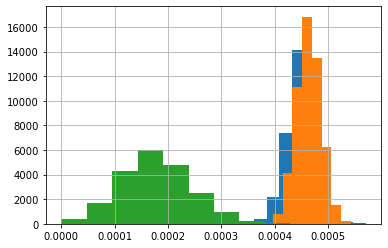

In [15]:
dfa.aev_cheops.hist(density=True)
dfb.aev_cheops.hist(density=True)
dfc.aev_cheops.hist(density=True)

## Basic parameters

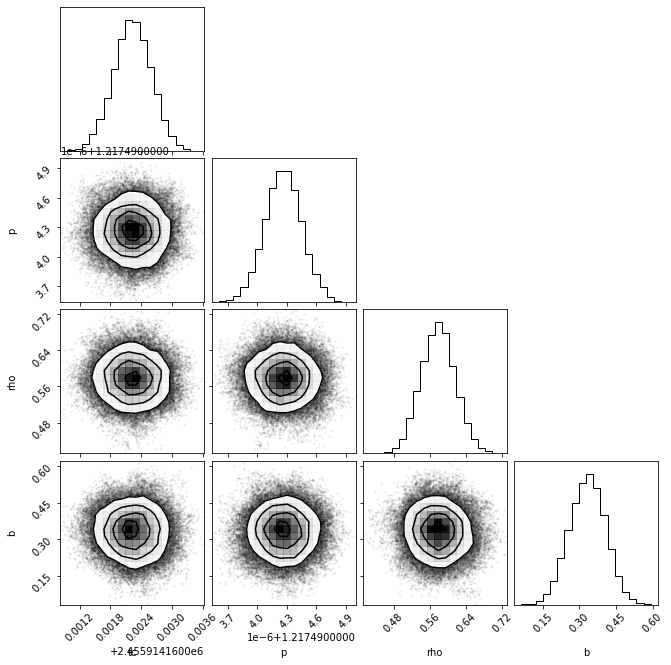

In [12]:
corner(dfa.iloc[:,:4], labels=dfa.columns[:4]);

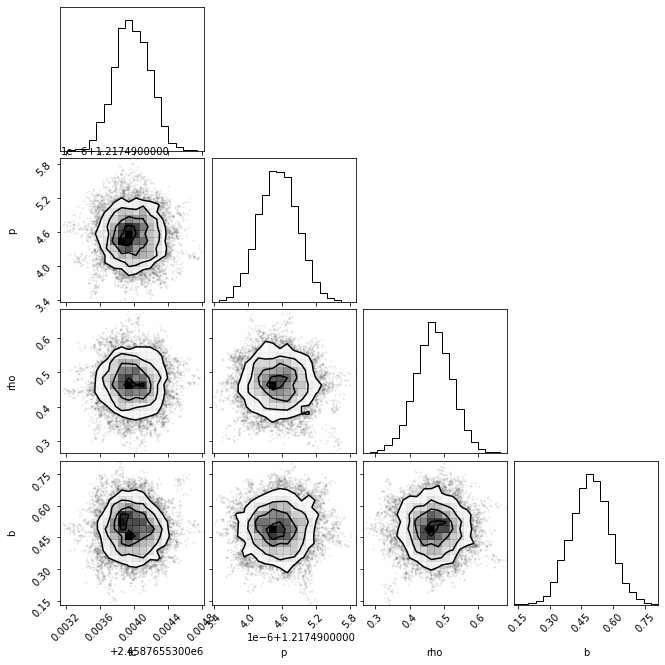

In [8]:
corner(dfaa.iloc[:,:4], labels=dfa.columns[:4]);

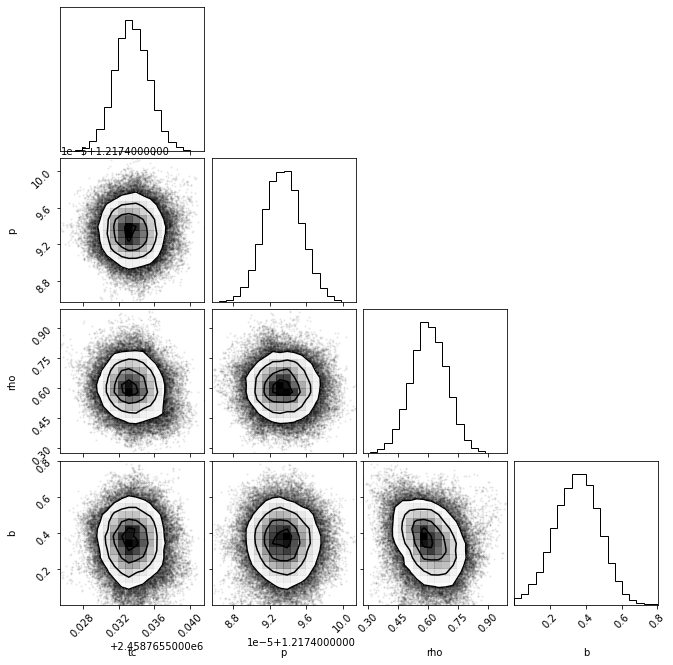

In [9]:
corner(dfb.iloc[:,:4], labels=dfb.columns[:4]);

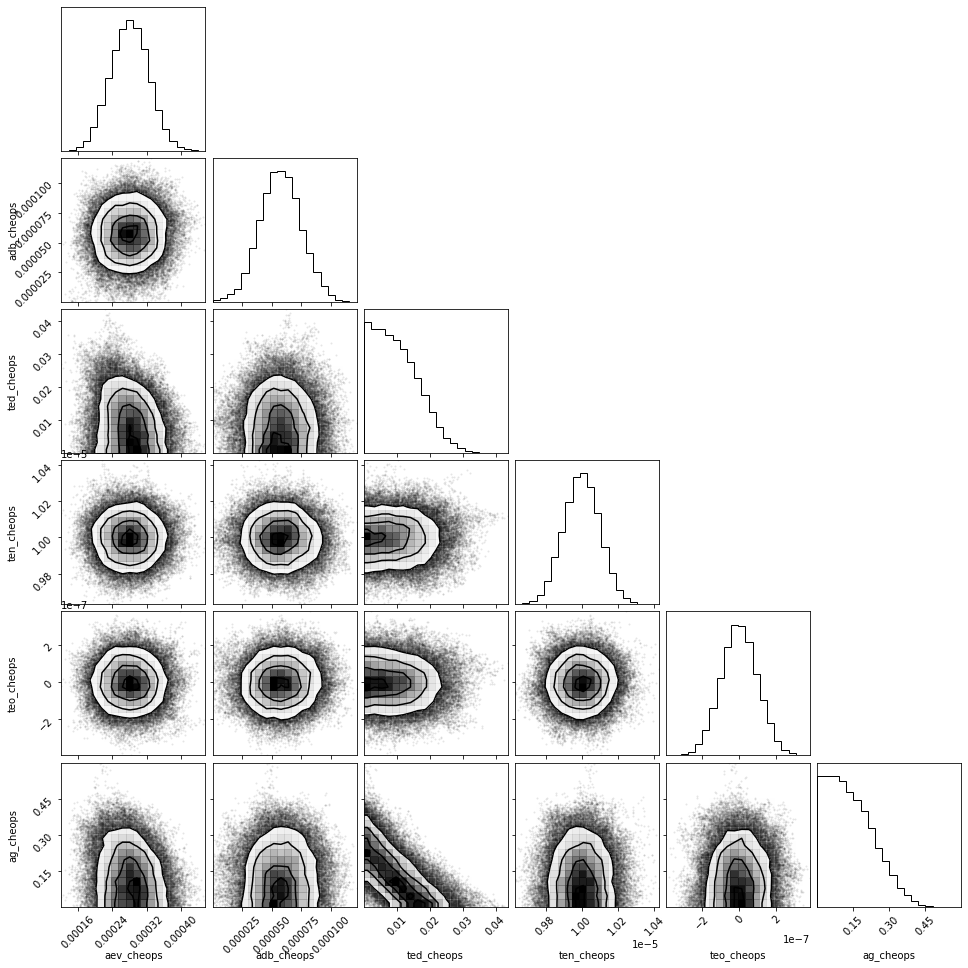

In [10]:
corner(dfa.iloc[:,7:13], labels=dfa.columns[7:13]);

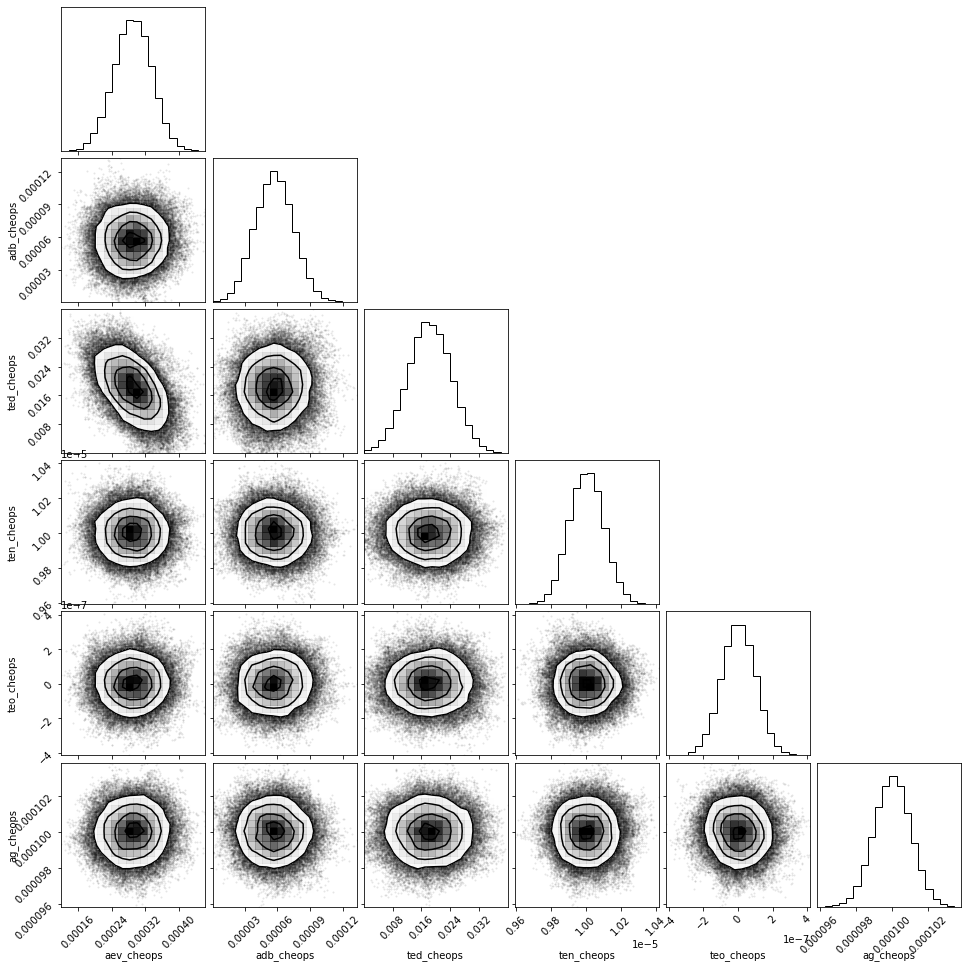

In [27]:
corner(dfb.iloc[:,7:13], labels=dfb.columns[7:13]);

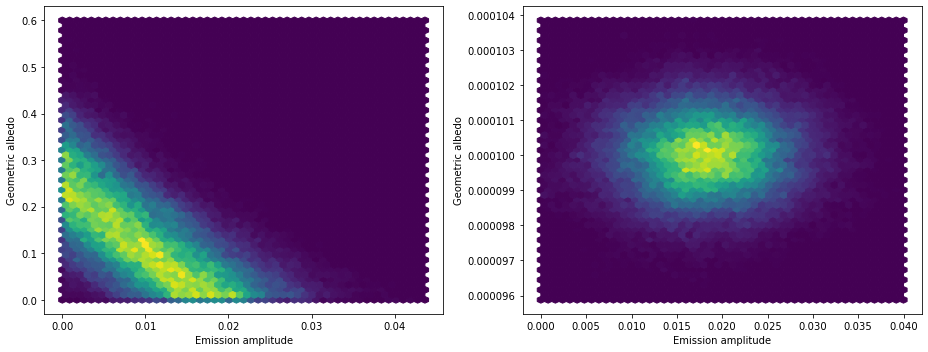

In [33]:
fig, axs = subplots(1, 2, figsize=(13,5))
axs[0].hexbin(dfa.ted_cheops, dfa.ag_cheops, gridsize=50)
axs[1].hexbin(dfb.ted_cheops, dfb.ag_cheops, gridsize=50)
setp(axs, ylabel='Geometric albedo', xlabel='Emission amplitude')
fig.tight_layout()

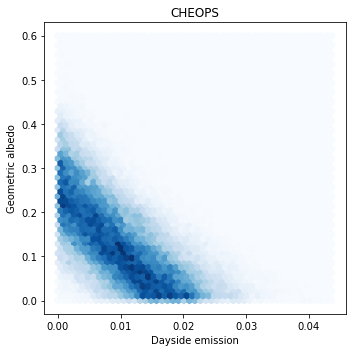

In [62]:
fig, ax = subplots(figsize=(5,5))
ax.hexbin(dfa.ted_cheops, dfa.ag_cheops, gridsize=50, cmap=cm.Blues)
setp(ax, ylabel='Geometric albedo', xlabel='Dayside emission')
ax.set_title('CHEOPS')
fig.tight_layout()
fig.savefig('emission_vs_ag_cheops.png')

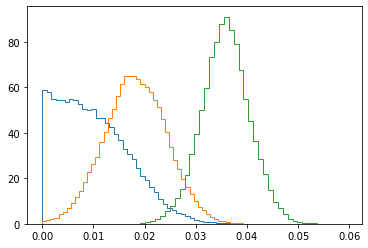

In [51]:
hist(dfa.ted_cheops, bins=50, density=True, fill=False, histtype='step')
hist(dfb.ted_cheops, bins=50, density=True, fill=False, histtype='step')
hist(dfc.ted_cheops, bins=50, density=True, fill=False, histtype='step');

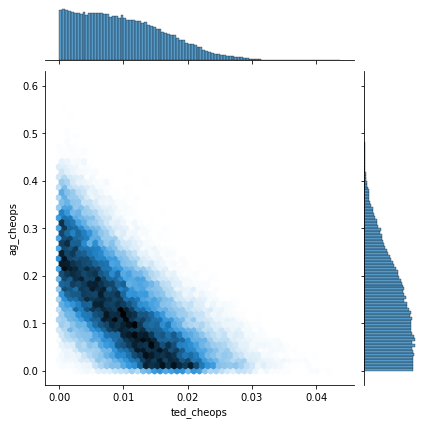

In [17]:
sb.jointplot(x=dfa.ted_cheops, y=dfa.ag_cheops, kind='hex')

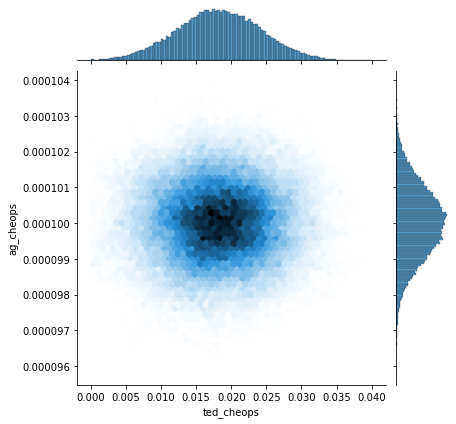

In [12]:
sb.jointplot(x=dfb.ted_cheops, y=dfb.ag_cheops, kind='hex')

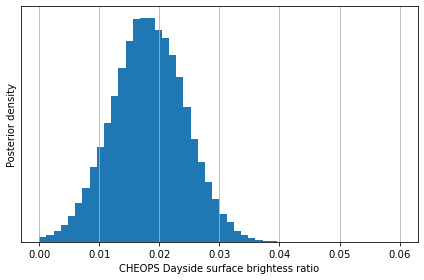

In [66]:
fig, ax = subplots()
dfb.ted_cheops.hist(bins=50, range=(0,0.06))
setp(ax, xlabel='CHEOPS Dayside surface brightess ratio', ylabel='Posterior density', yticks=[])
fig.tight_layout()
fig.savefig('CHEOPS_dayside_posterior.png')

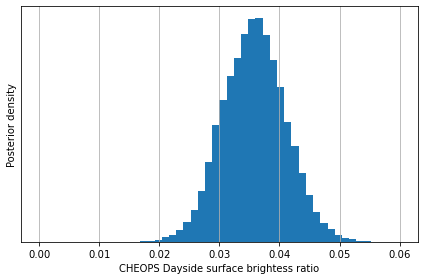

In [64]:
fig, ax = subplots()
dfc.ted_cheops.hist(bins=50, range=(0,0.06))
setp(ax, xlabel='CHEOPS Dayside surface brightess ratio', ylabel='Posterior density', yticks=[])
fig.tight_layout()
fig.savefig('CHEOPS_dayside_posterior_eclipse_only.png')

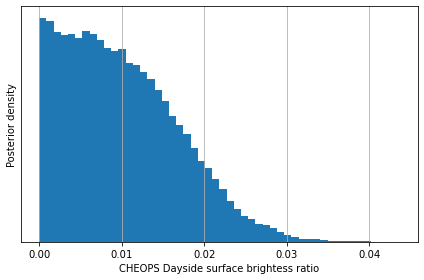

In [48]:
fig, ax = subplots()
dfa.ted_cheops.hist(bins=50)
setp(ax, xlabel='CHEOPS Dayside surface brightess ratio', ylabel='Posterior density', yticks=[])
fig.tight_layout()
fig.savefig('CHEOPS_dayside_posterior.png')

<AxesSubplot:>

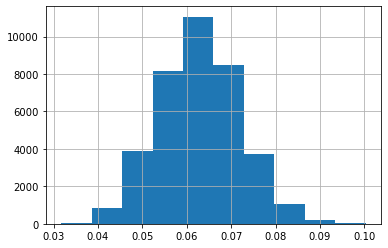

In [128]:
dfj.ted_TESS.hist()

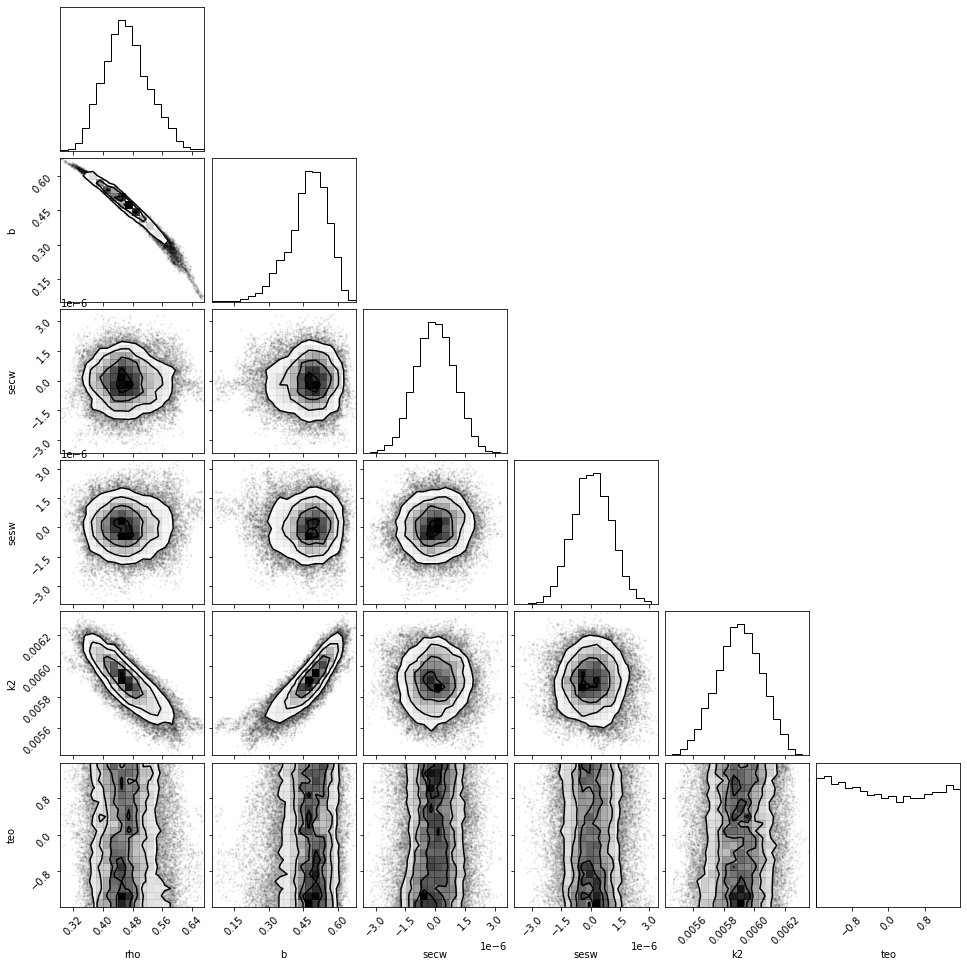

In [28]:
corner(dfj.iloc[:,2:8], labels=dfj.columns[2:8]);

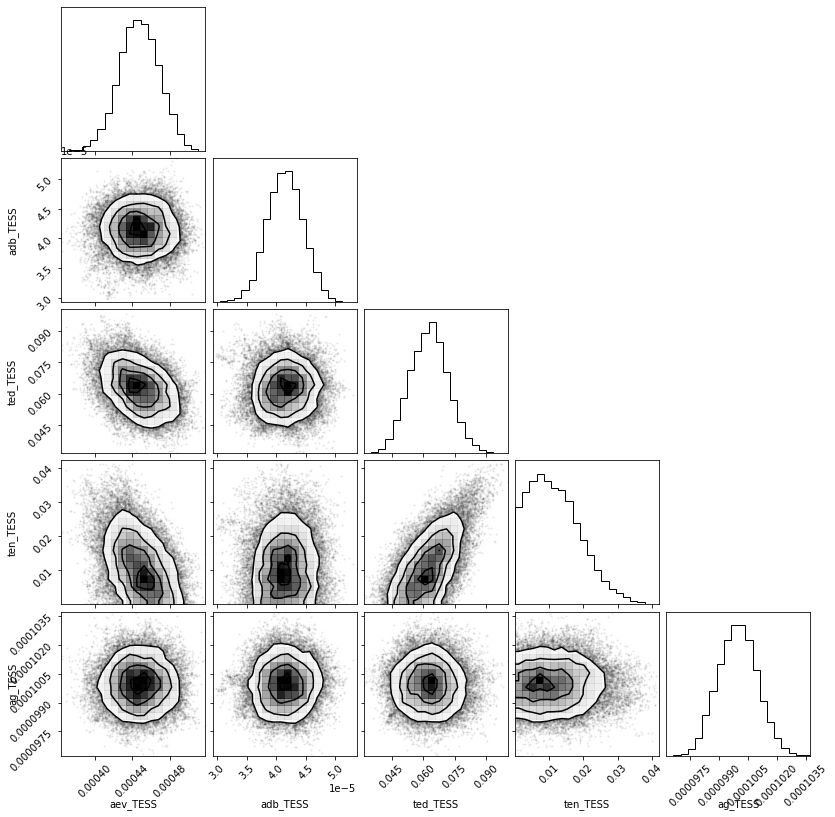

In [29]:
corner(df.iloc[:,8:13], labels=df.columns[8:13]);

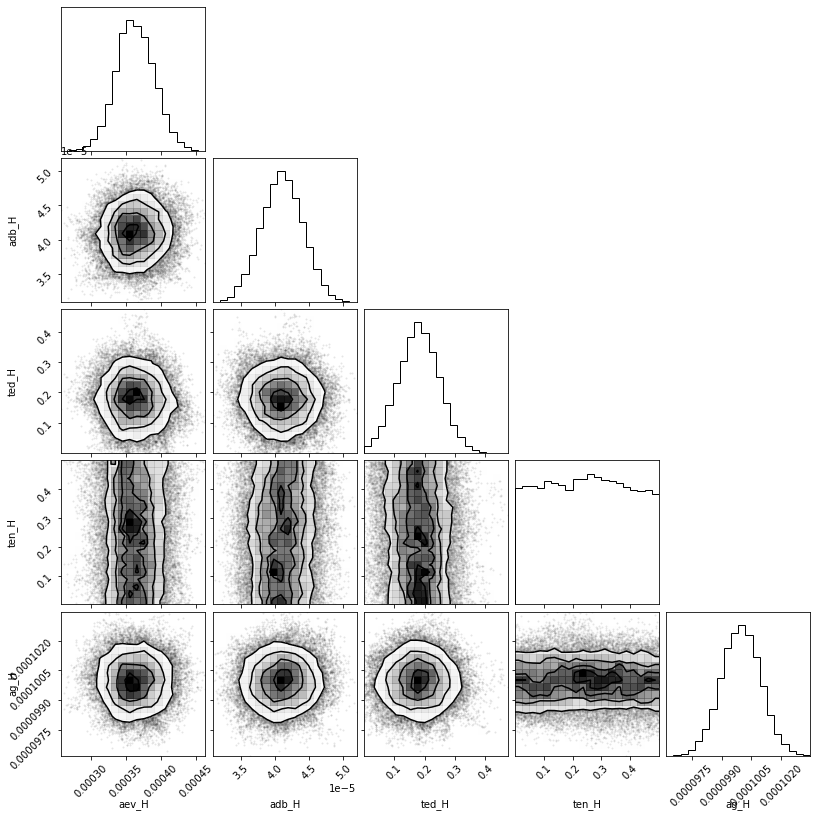

In [30]:
corner(df.iloc[:,13:18], labels=df.columns[13:18]);

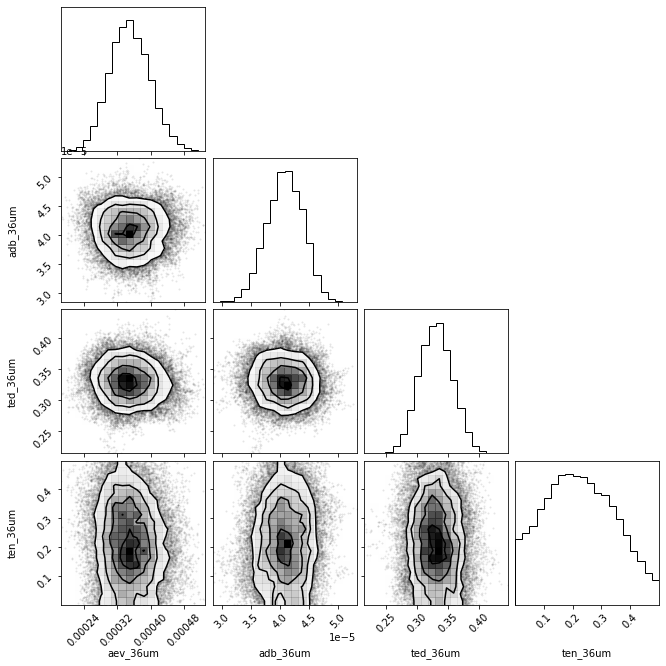

In [34]:
corner(df.iloc[:,18:22], labels=df.columns[18:22]);

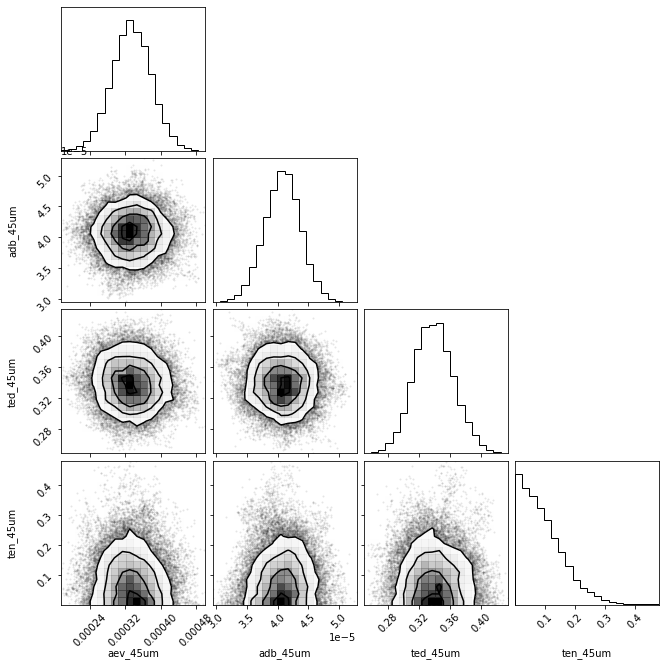

In [33]:
corner(df.iloc[:,23:27], labels=df.columns[23:27]);

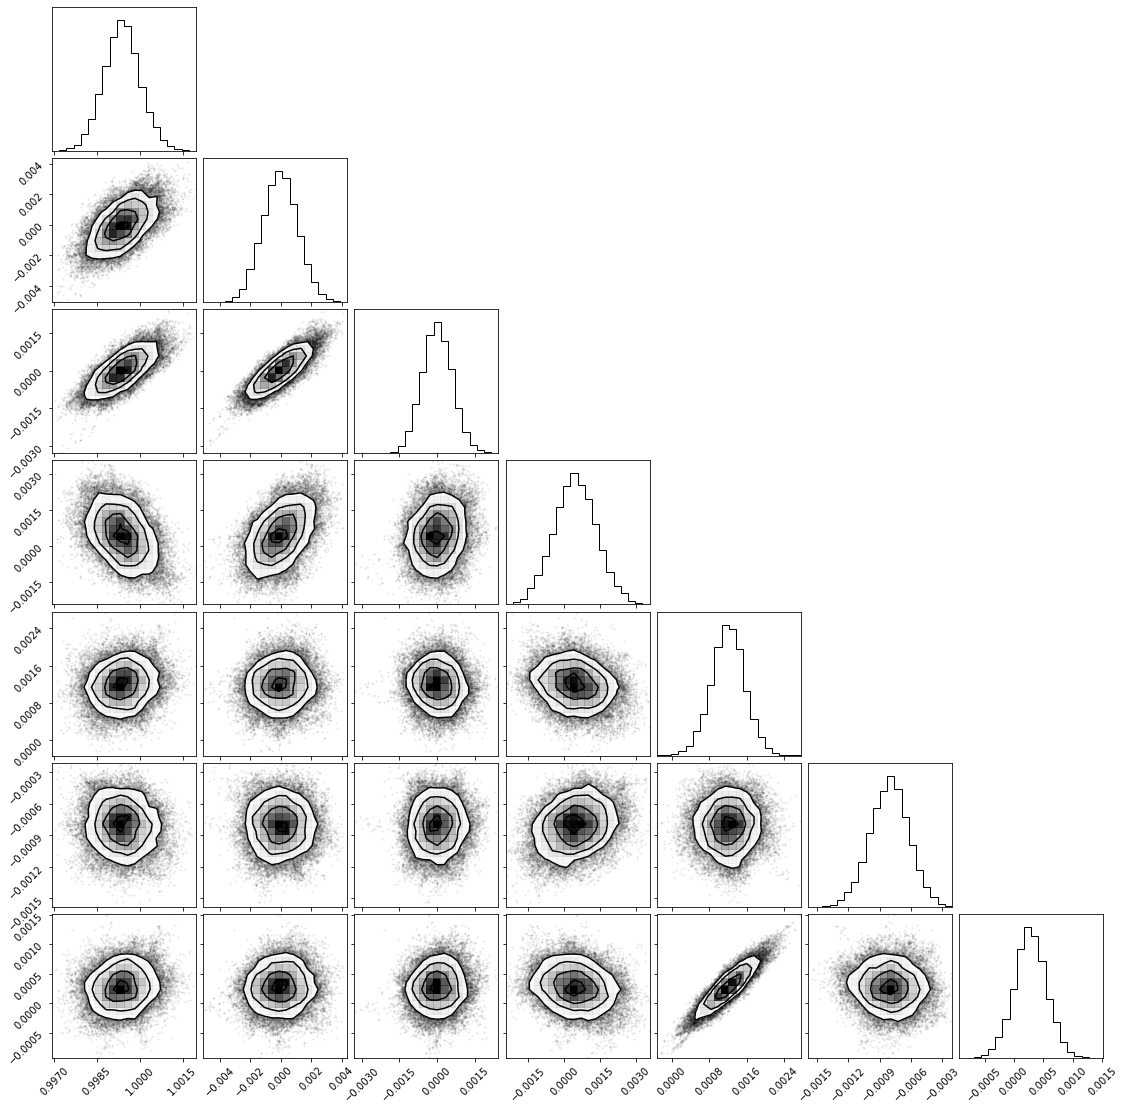

In [41]:
corner(dfj.iloc[:,-7:]);

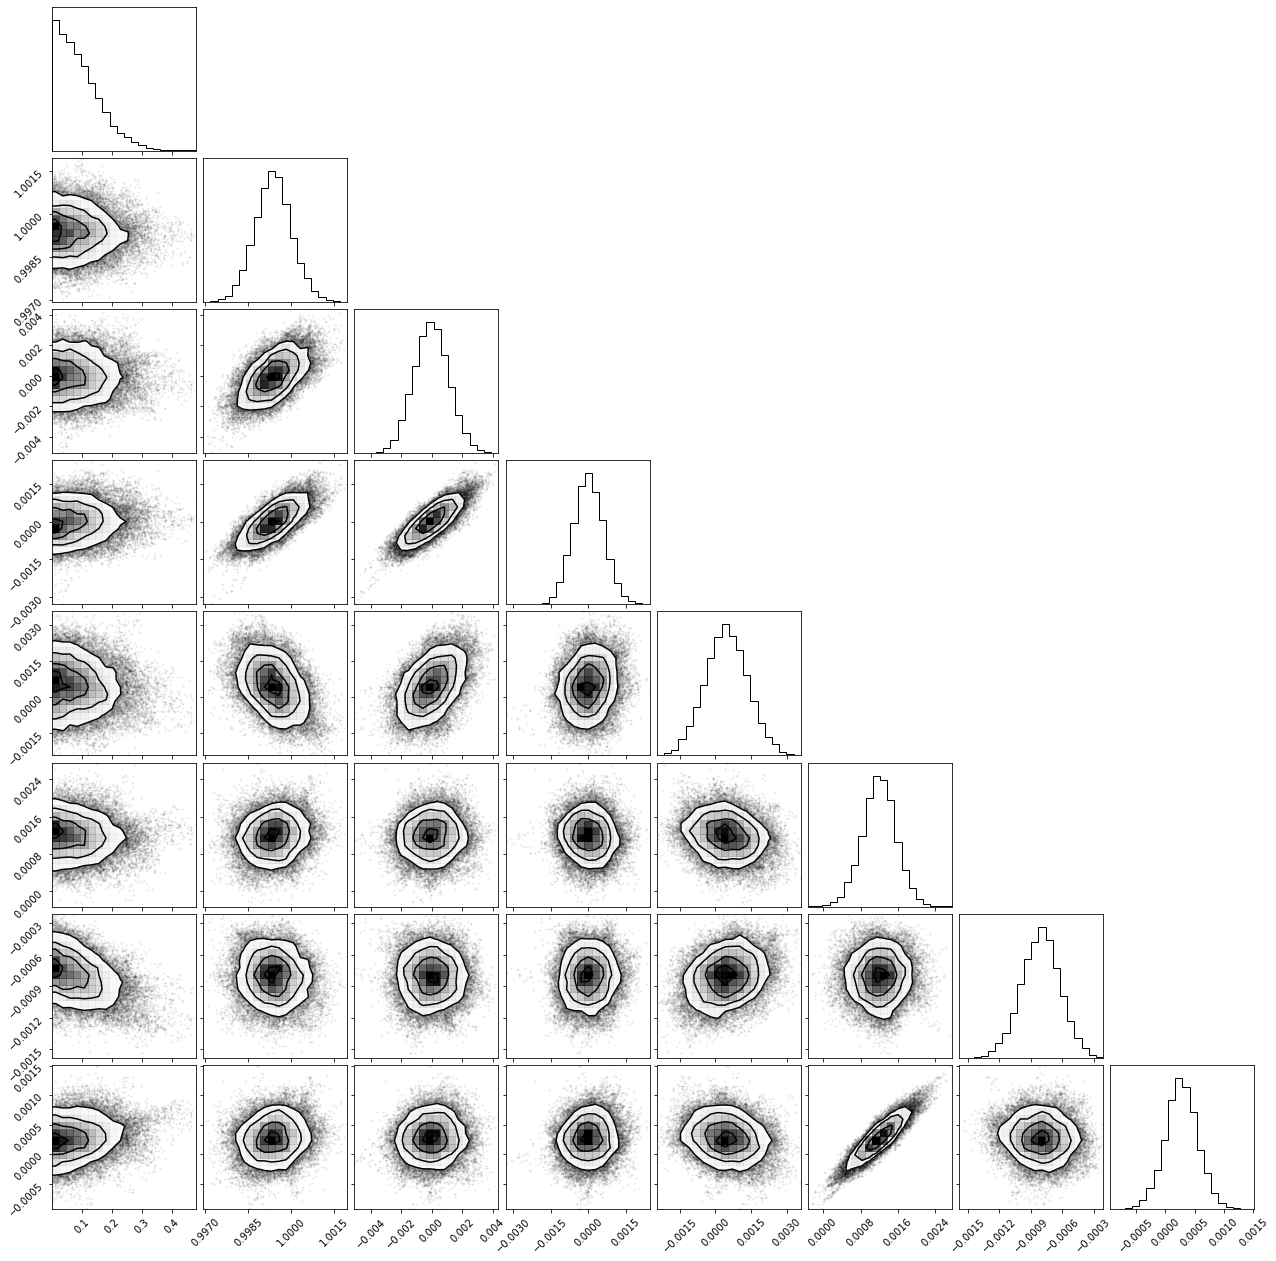

In [47]:
d = pd.concat([dfj.ten_45um, dfj.iloc[:,-7:]], axis=1)
corner(d);

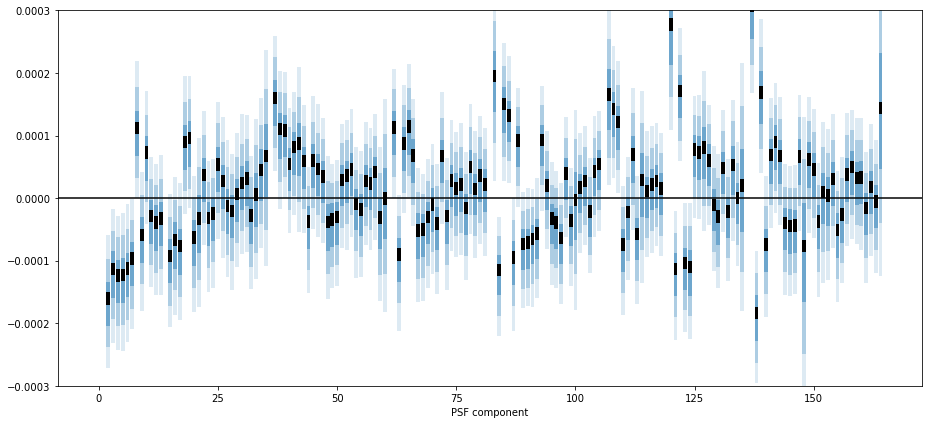

In [52]:
fig, ax = subplots(figsize=(13,6))
bplot(dfa.iloc[:,15:])
ax.set_ylim(-0.0003, 0.0003)
setp(ax, xlabel='PSF component')
fig.tight_layout()